In [1]:
import arviz as az
import matplotlib.cm as cmap
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import theano
import theano.tensor as tt

%matplotlib inline

## 1. Mean functions

In [4]:
X = np.linspace(0, 1, 5)[:, None]
X

array([[0.  ],
       [0.25],
       [0.5 ],
       [0.75],
       [1.  ]])

#### Zero function

In [5]:
zero_func = pm.gp.mean.Zero()
zero_func(X).eval()

array([0., 0., 0., 0., 0.], dtype=float32)

#### Constant function

In [7]:
const_func = pm.gp.mean.Constant(4.5)
const_func(X).eval()

array([4.5, 4.5, 4.5, 4.5, 4.5], dtype=float32)

#### Linear function

In [9]:
beta = np.random.randn(3)
intercept = 0.0
lin_func = pm.gp.mean.Linear(coeffs=beta, intercept=intercept)

X = np.random.randn(5,3)
lin_func(X).eval()

array([ 3.5312593 ,  0.12093741,  0.30661971, -1.16529643, -0.53009691])

## 2. Covariance functions

#### Exponential Quadratic

In [27]:
len_scale = 0.2
eta = 2.0
cov = eta**2 * pm.gp.cov.ExpQuad(1, len_scale)
# Add white noise to stabilise
cov += pm.gp.cov.WhiteNoise(1e-6)

X = np.linspace(0, 2, 200)[:, None]
K = cov(X).eval()

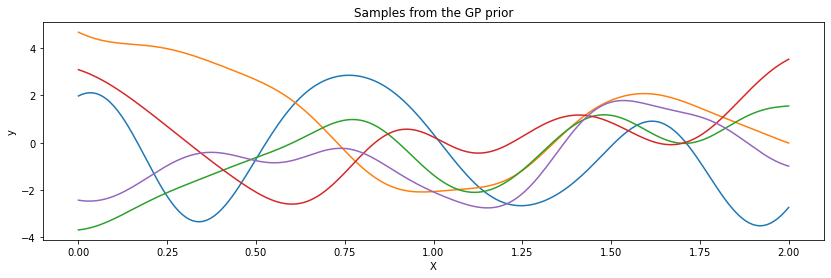

In [34]:
plt.figure(figsize=(14, 4))

y = pm.MvNormal.dist(mu=np.zeros(len(K)), cov=K, shape=K.shape[0]).random(size=5).T
plt.plot(X, y)
plt.title("Samples from the GP prior")
plt.ylabel("y")
plt.xlabel("X");

In [35]:
y.shape, X.shape, K.shape

((200, 5), (200, 1), (200, 200))

In [ ]:
## Two dimensional inputs
x1 = 